### load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)
import os
%run EEG_auxiliary_module_sptm_wICA.ipynb


In [2]:
print(sklearn.__version__)

0.20.0


### create plotting functions 

In [10]:
def temp_Gen_Plot(subj,cond,ctype,times):
    time1 = times[0]
    time2 = times[1]
    if ctype == 'multi':
        vmin = .2
        vmax = .3
        avgaxis = 0
    elif ctype == 'binary':
        vmin = .5
        vmax = .6
        avgaxis = (0,1)

    savefolder = os.path.join('Results',subj,'Temporal Generalization')
    savefile = os.path.join(savefolder,'scores'+cond+'_'+ctype+'.npy')
    scores = np.load(savefile)
    # Mean scores across binary classses
    scoresMean = np.nanmean(scores, axis=avgaxis)
    timeAll = np.linspace(-.2,2,scoresMean.shape[0])
    tidx1 = find_nearest_idx(timeAll,time1)
    tidx2 = find_nearest_idx(timeAll,time2)
    time = timeAll[tidx1:tidx2]

    ## Plot the diagonal (it's exactly the same as the time-by-time decoding above)
    # fig, ax = plt.subplots()
    # ax.plot(time, np.diag(scoresMean), label='score')
    # ax.axhline(.2, color='k', linestyle='--', label='chance')
    # ax.set_xlabel('Times')
    # ax.set_ylabel('AUC')
    # ax.legend()
    # ax.axvline(.0, color='k', linestyle='-')
    # ax.set_title('Decoding over time '+ subj)
    # savefig = os.path.join(savefolder,'accpertime'+cond+'_'+ctype+'.png')
    # plt.savefig(savefig)

    fig, ax = plt.subplots(1, 1, figsize = (12,10))
    im = ax.imshow(scoresMean[tidx1:tidx2,tidx1:tidx2], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=time[[0, -1, 0, -1]], vmin=vmin, vmax=vmax) #, vmin=0., vmax=1.
    ax.set_xlabel('Testing Time (s)')
    ax.set_xlim([time1, time2])
    ax.set_ylabel('Training Time (s)')
    ax.set_ylim([time1, time2])
    ax.set_title('Temporal generalization '+ subj)
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    # savefig = os.path.join(savefolder,'tempgen'+cond+'_'+ctype+'.png')
    # plt.savefig(savefig)

In [7]:
def temp_Gen_Plot_average(cond,ctype,times):
    time1 = times[0]
    time2 = times[1]
    if ctype == 'multi':
        vmin = .2
        vmax = .25
        avgaxis = 0
    elif ctype == 'binary':
        vmin = .5
        vmax = .55
        avgaxis = (0,1)
    
    subjects = [str(s) for s in range(101,111)]
    scoresMeanAll = np.zeros((218,218))
    for s, subj in enumerate(subjects):
        savefolder = os.path.join('Results',subj,'Temporal Generalization')
        savefile = os.path.join(savefolder,'scores'+cond+'_'+ctype+'.npy')
        scores = np.load(savefile)
        # Mean scores across binary classses
        scoresMeanAll = scoresMeanAll+np.nanmean(scores, axis=avgaxis)
        
    scoresMeanAll = scoresMeanAll/len(subjects)
    timeAll = np.linspace(-.2,2,scoresMeanAll.shape[0])
    tidx1 = find_nearest_idx(timeAll,time1)
    tidx2 = find_nearest_idx(timeAll,time2)
    time = timeAll[tidx1:tidx2]

    ## Plot the diagonal (it's exactly the same as the time-by-time decoding above)
    # fig, ax = plt.subplots()
    # ax.plot(time, np.diag(scoresMean), label='score')
    # ax.axhline(.2, color='k', linestyle='--', label='chance')
    # ax.set_xlabel('Times')
    # ax.set_ylabel('AUC')
    # ax.legend()
    # ax.axvline(.0, color='k', linestyle='-')
    # ax.set_title('Decoding over time '+ subj)
    # savefig = os.path.join(savefolder,'accpertime'+cond+'_'+ctype+'.png')
    # plt.savefig(savefig)

    fig, ax = plt.subplots(1, 1, figsize = (12,10))
    im = ax.imshow(scoresMeanAll[tidx1:tidx2,tidx1:tidx2], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=time[[0, -1, 0, -1]], vmin=vmin, vmax=vmax) #, vmin=0., vmax=1.
    ax.set_xlabel('Testing Time (s)')
    ax.set_xlim([time1, time2])
    ax.set_ylabel('Training Time (s)')
    ax.set_ylim([time1, time2])
    ax.set_title('Temporal generalization average '+cond)
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    savefig = os.path.join('GroupFigures','Temporal Generalization','tempgen'+cond+'_'+ctype+'.png')
    plt.savefig(savefig)


### plot temporal generalization maps for all classifications 

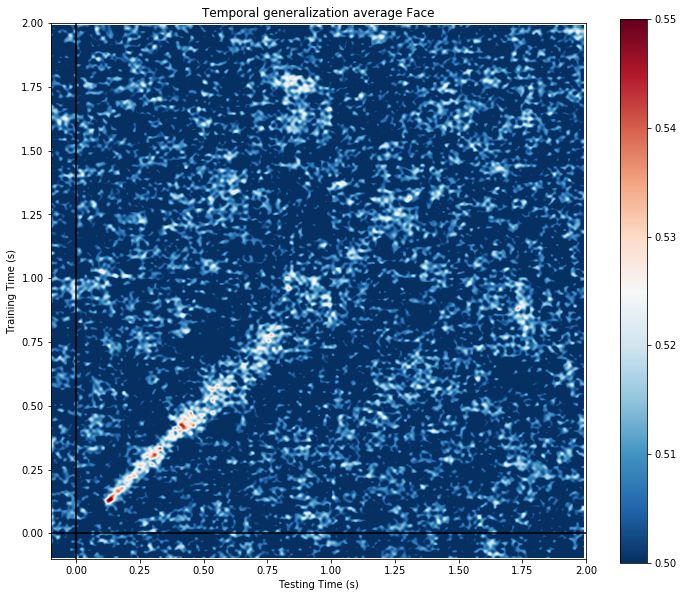

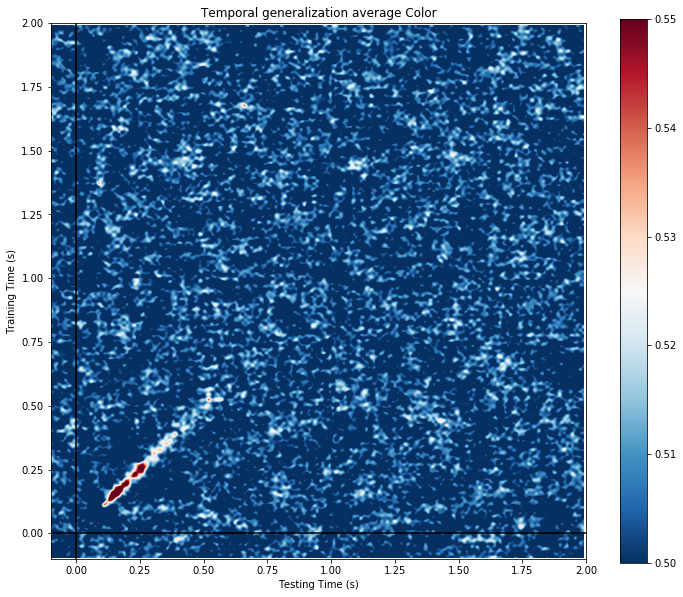

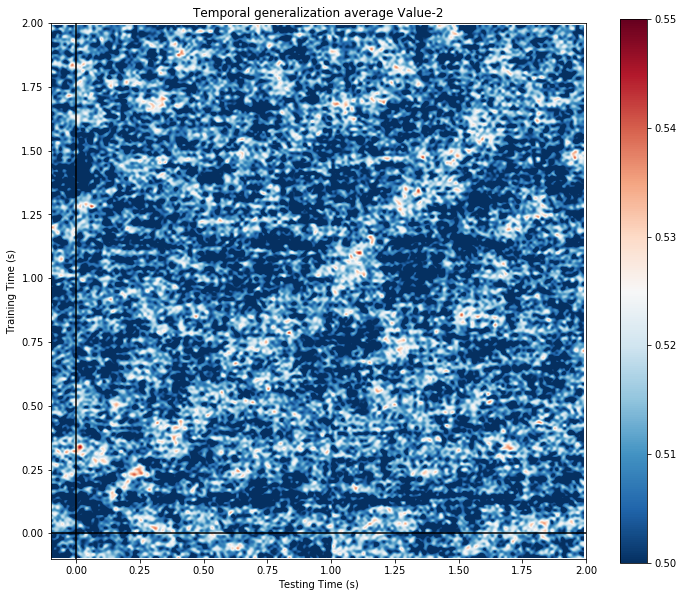

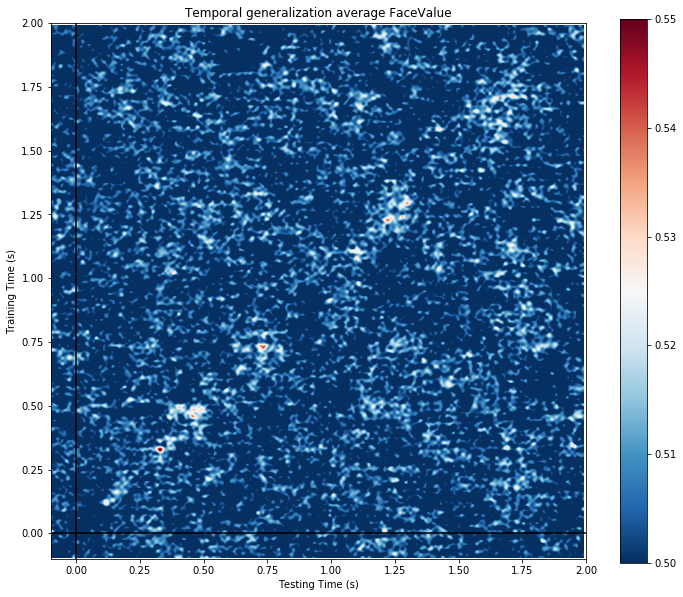

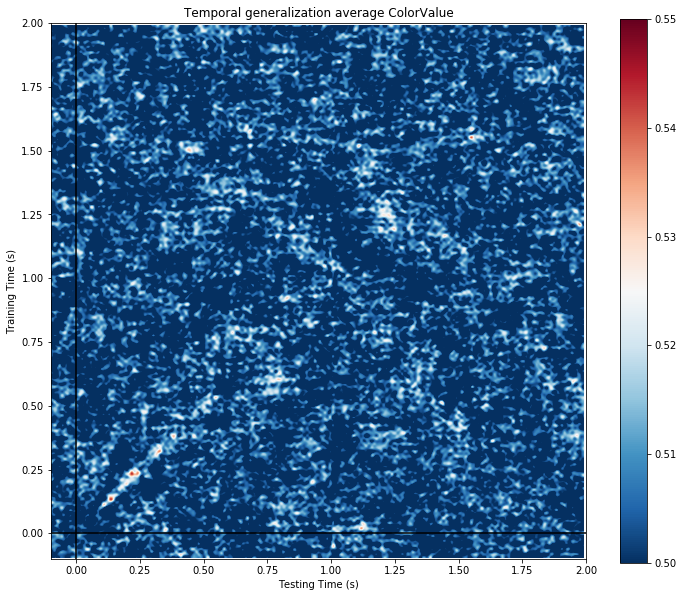

In [8]:
# temp_Gen_Plot('109','Color','multi',(-.1,2))
temp_Gen_Plot_average('Face','binary',(-.1,2))
temp_Gen_Plot_average('Color','binary',(-.1,2))
temp_Gen_Plot_average('Value-2','binary',(-.1,2))
temp_Gen_Plot_average('FaceValue','binary',(-.1,2))
temp_Gen_Plot_average('ColorValue','binary',(-.1,2))

In [5]:
savefile = os.path.join(savefolder,'scores'+'Face'+'_'+'binary'+'.npy')
scores = np.load(savefile)


In [6]:
scores.shape

(10, 6, 218, 218)

array([[0.45833333, 0.44      , 0.49666667, ..., 0.485     , 0.52      ,
        0.54333333],
       [0.42666667, 0.42      , 0.44333333, ..., 0.52833333, 0.52833333,
        0.535     ],
       [0.45833333, 0.43      , 0.45      , ..., 0.54166667, 0.55333333,
        0.52666667],
       ...,
       [0.485     , 0.52333333, 0.53333333, ..., 0.49833333, 0.51      ,
        0.505     ],
       [0.52333333, 0.55166667, 0.53666667, ..., 0.555     , 0.54      ,
        0.545     ],
       [0.53166667, 0.55      , 0.51833333, ..., 0.55666667, 0.55833333,
        0.58833333]])

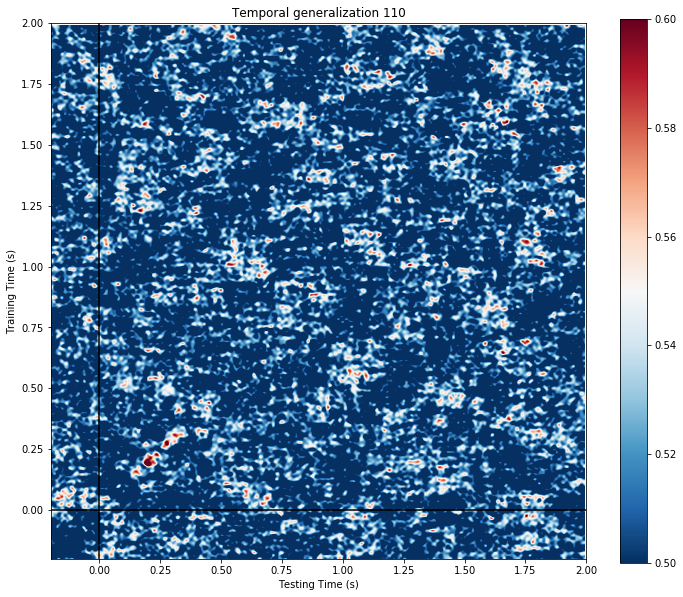

In [9]:
temp_Gen_Plot('110','Color','binary',(-.2,2))
